In [45]:
import rmgpy
import rmg
import numpy as np
from rmgpy.data.rmg import RMGDatabase
from rmgpy import settings
from rmgpy.molecule import Molecule
from rmgpy.species import Species
from rmgpy.thermo.thermoengine import submit
import os
path = os.path.join(settings['database.directory'],'thermo')
database = RMGDatabase()
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
database.load_thermo(path=path,thermo_libraries=['primaryThermoLibrary','surfaceThermoPt111','thermo_DFT_CCSDTF12_BAC','DFT_QCI_thermo'],
              surface=True)

In [44]:
deutschmann = rmgpy.chemkin.load_chemkin_file('deutschmann_pt_combined.txt',
                                dictionary_path='species_dictionary.txt',
                                read_comments=False)

In [11]:
deutschmann_rxns = deutschmann[1]
species_rmg_dict = rmgpy.chemkin.load_species_dictionary('species_dictionary.txt')
species_deutuschmann_dict = rmgpy.chemkin.load_species_dictionary('species_dictionary.txt')

In [12]:
for reaction in deutschmann_rxns:
    for s in reaction.reactants:
        species_deutuschmann_dict[s.label] = s
    for s in reaction.products:
        species_deutuschmann_dict[s.label] = s

In [23]:
for label, species in species_rmg_dict.items():
    submit(species)

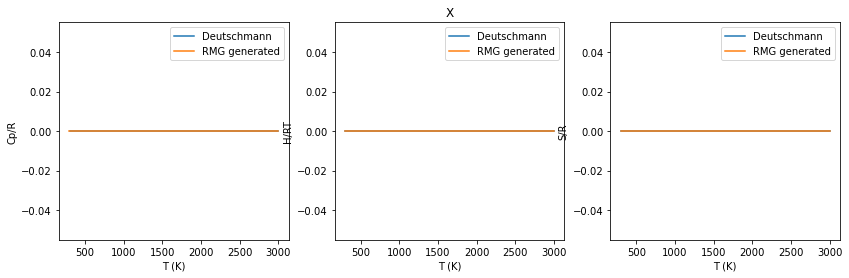

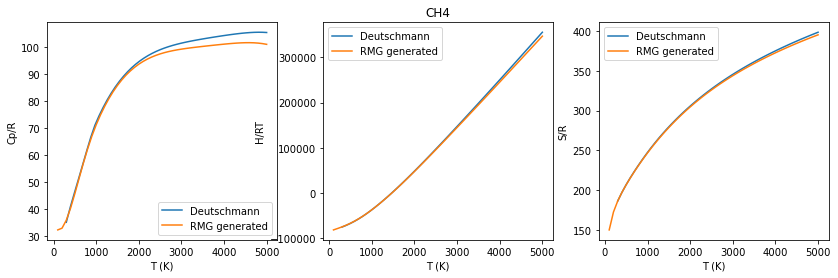

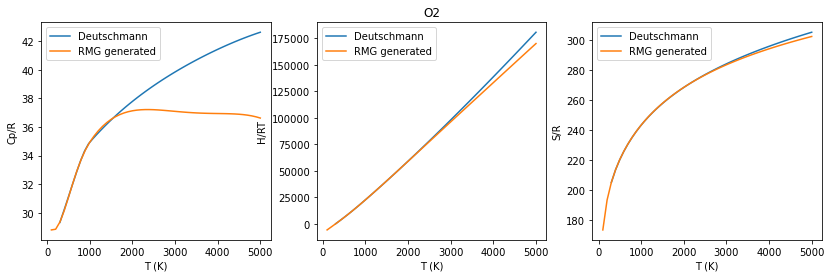

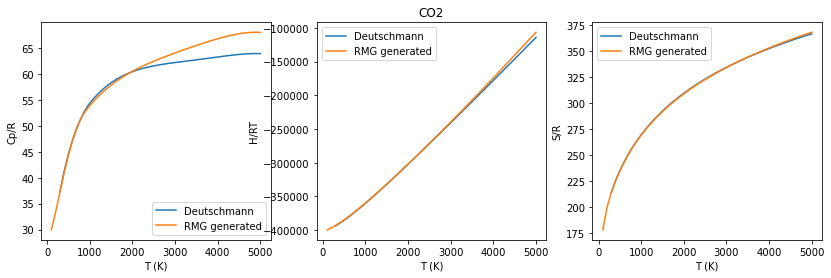

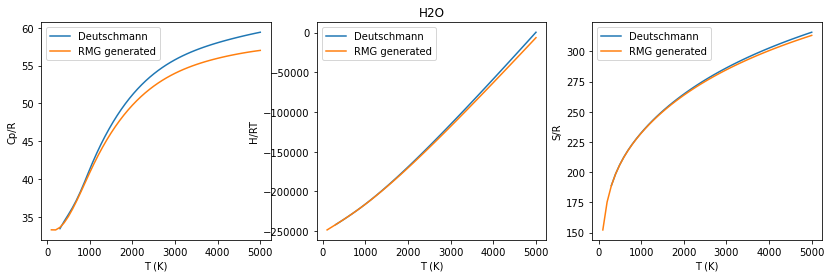

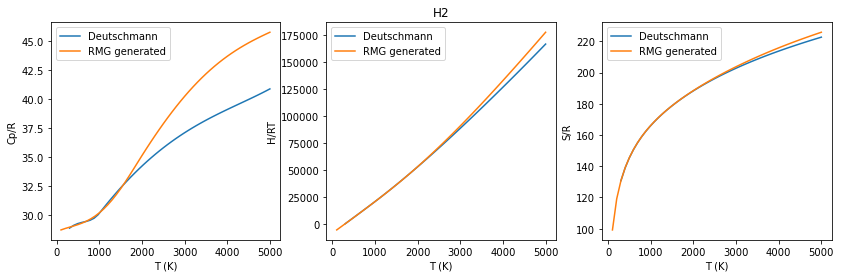

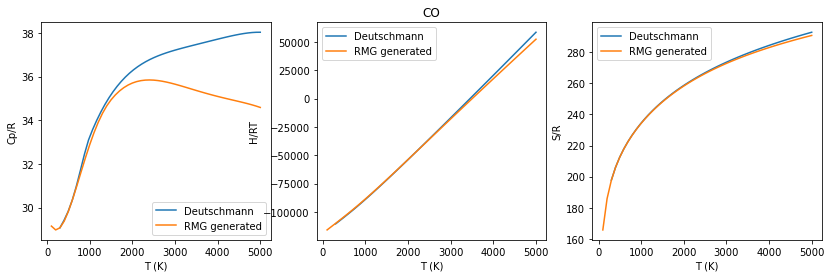

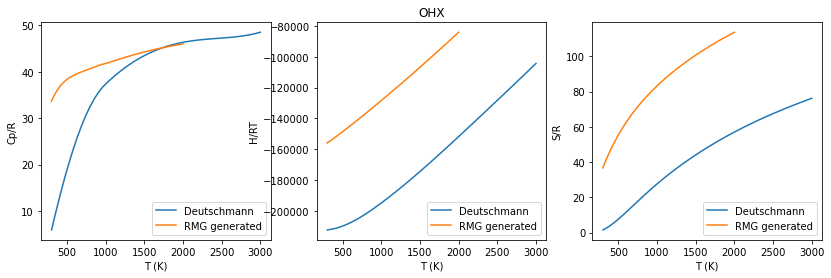

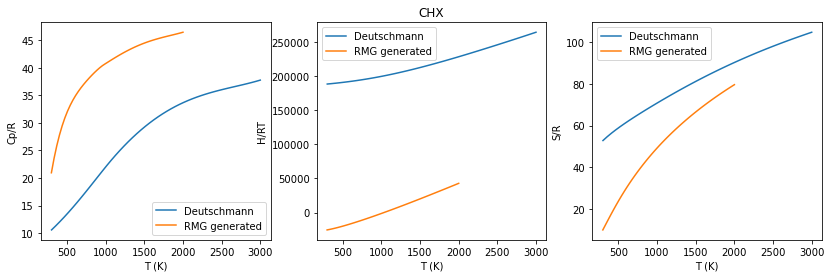

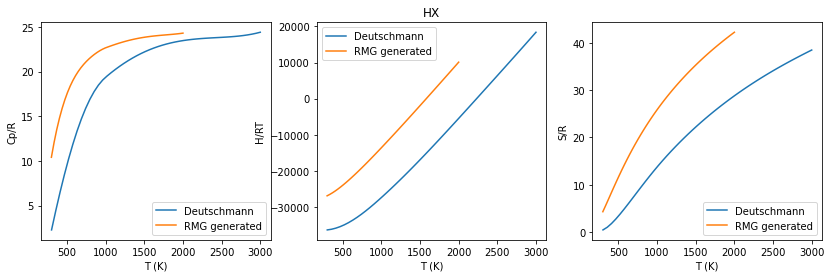

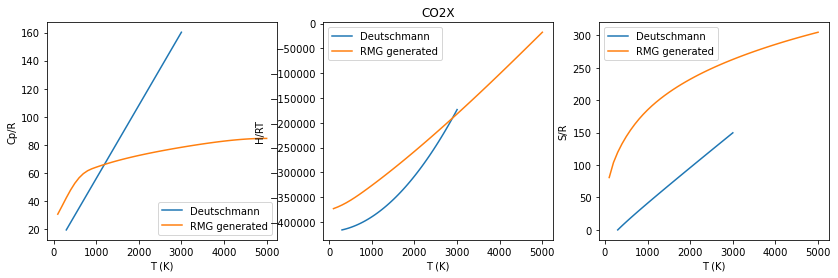

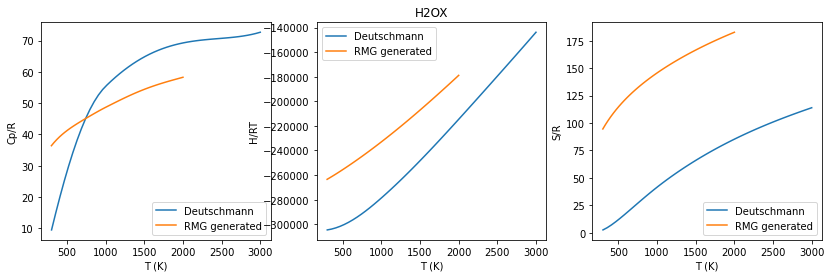

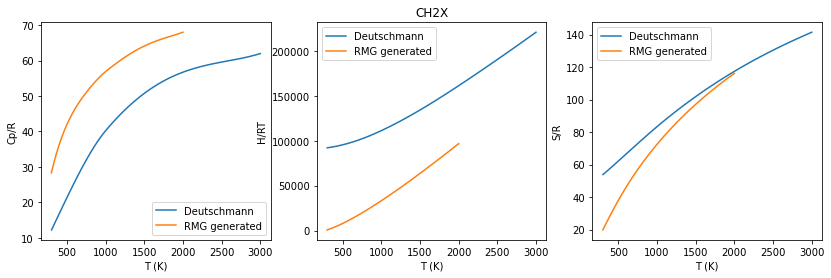

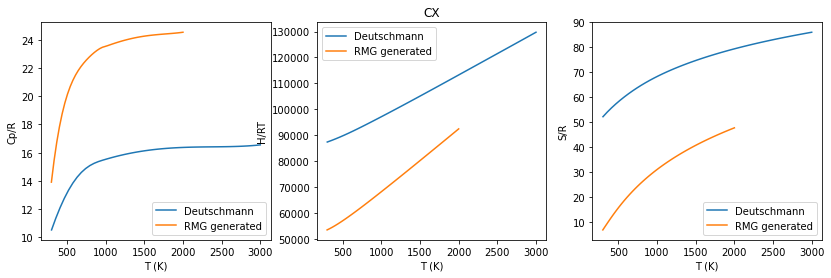

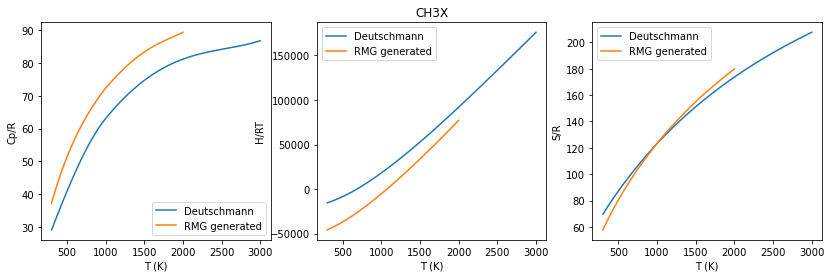

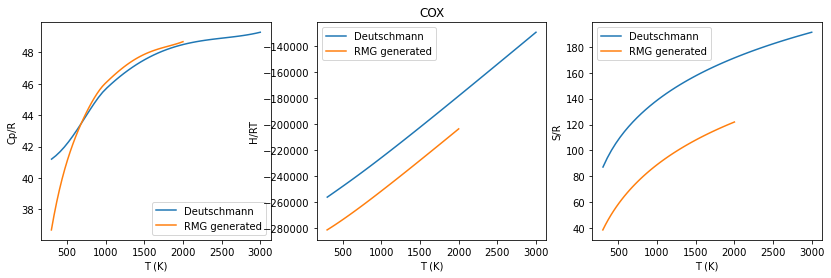

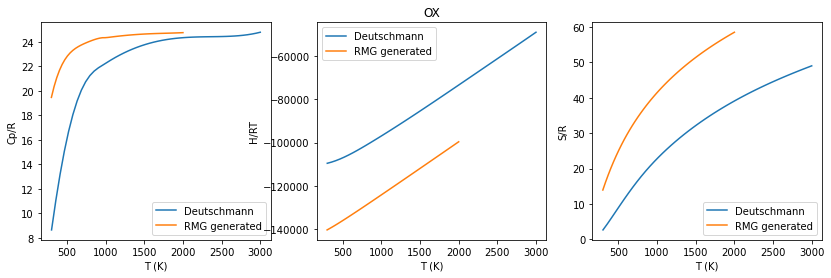

In [14]:
for species in species_deutuschmann_dict:
    # deutschmann thermo
    tmin_d, tmax_d = species_deutuschmann_dict[species].thermo.Tmin, species_deutuschmann_dict[species].thermo.Tmax
    t_d = np.linspace(tmin_d.value_si, tmax_d.value_si, 50)
    Cp_d = np.linspace(0, 0, 50)
    H_d = np.linspace(0, 0, 50)
    S_d = np.linspace(0, 0, 50)
    
    for i,t in enumerate(t_d):
        Cp_d[i] = species_deutuschmann_dict[species].thermo.get_heat_capacity(t)
        H_d[i] = species_deutuschmann_dict[species].thermo.get_enthalpy(t)
        S_d[i] = species_deutuschmann_dict[species].thermo.get_entropy(t)
    
    # rmg thermo
    tmin_rmg, tmax_rmg = species_rmg_dict[species].thermo.Tmin, species_rmg_dict[species].thermo.Tmax
    t_rmg = np.linspace(tmin_rmg.value_si, tmax_rmg.value_si, 50)
    Cp_rmg = np.linspace(0, 0, 50)
    H_rmg = np.linspace(0, 0, 50)
    S_rmg = np.linspace(0, 0, 50)
    
    for i,t in enumerate(t_rmg):
        Cp_rmg[i] = species_rmg_dict[species].thermo.get_heat_capacity(t)
        H_rmg[i] = species_rmg_dict[species].thermo.get_enthalpy(t)
        S_rmg[i] = species_rmg_dict[species].thermo.get_entropy(t)
    
    f = plt.figure(figsize=(14,4))
    ax = f.add_subplot(131)
    ax2 = f.add_subplot(132)
    ax3 = f.add_subplot(133)
    ax.plot(t_d, Cp_d, label='Deutschmann')
    ax.plot(t_rmg, Cp_rmg, label='RMG generated')

    ax2.plot(t_d, H_d, label='Deutschmann')
    ax2.plot(t_rmg, H_rmg, label='RMG generated')
    ax3.plot(t_d, S_d, label='Deutschmann')
    ax3.plot(t_rmg, S_rmg, label='RMG generated')

    ax.set_xlabel('T (K)')
    ax.set_ylabel('Cp/R')
    ax.legend(loc='best')

    ax2.set_xlabel('T (K)')
    ax2.set_ylabel('H/RT')
    ax2.legend(loc='best')

    ax3.set_xlabel('T (K)')
    ax3.set_ylabel('S/R')
    ax3.legend(loc='best')

    ax2.set_title(f'{species}')
    f.savefig(f'thermo_comparison/{species}.pdf')